# Phase space reconstruction from electrocardiogram recordings and Poincaré plots

### Ana Daniela del Río Pulido and Erin C. McKiernan

### Facultad de Ciencias, UNAM

In this practical, students already know the basics of electrocardiogram analysis and have passed throught he phase space recontruction notebook. They will learn how to make and interpret a Poincaré plot. Raw recordings for this practical can be collected by students, or they can work with existing recordings from our repository.

## Human electrocardiogram
The human electrocardiogram (ecg) is a physiological signal that is measured by placing electrodes that record the heart's voltage changes. Each part of the obtained signal corresponds to a particular action of the heart [Boron and Boulpaep, 2012] [BackyardBrains, 2017] [Kantz and Schreiber, 2004, pg. 344], this can be seen in the following figure. One period of the electrical signal of the heart is called the PQRST wave complex.
<img src="Images/ecg.png" width ="500" height ="200" > 

# Setting up the notebook

We begin by setting up the Jupyter notebook and importing the Python modules needed for plotting figures, create animations, etc. We include commands to view plots in the Jupyter notebook, and to create figures with good resolution and large labels. These commands can be customized to produce figures with other specifications.

In [4]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sys.path.insert(1, r'./../functions') # add to pythonpath

#For plotting in 3D
from matplotlib import rc
from mpl_toolkits.mplot3d import Axes3D


# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

## Extracting and graphing the data

ECG recordings were obtained using the Backyard Brains Heart and Brain Spiker Box. The recordings are saved as audio files in .wav format. The first thing we have to do is open the .wav files and extract the data. We can extract the number of recording channels, sampling rate, etc.

In [5]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file
def ecg(variable):
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData

Now, let's plot the raw ECG signal.

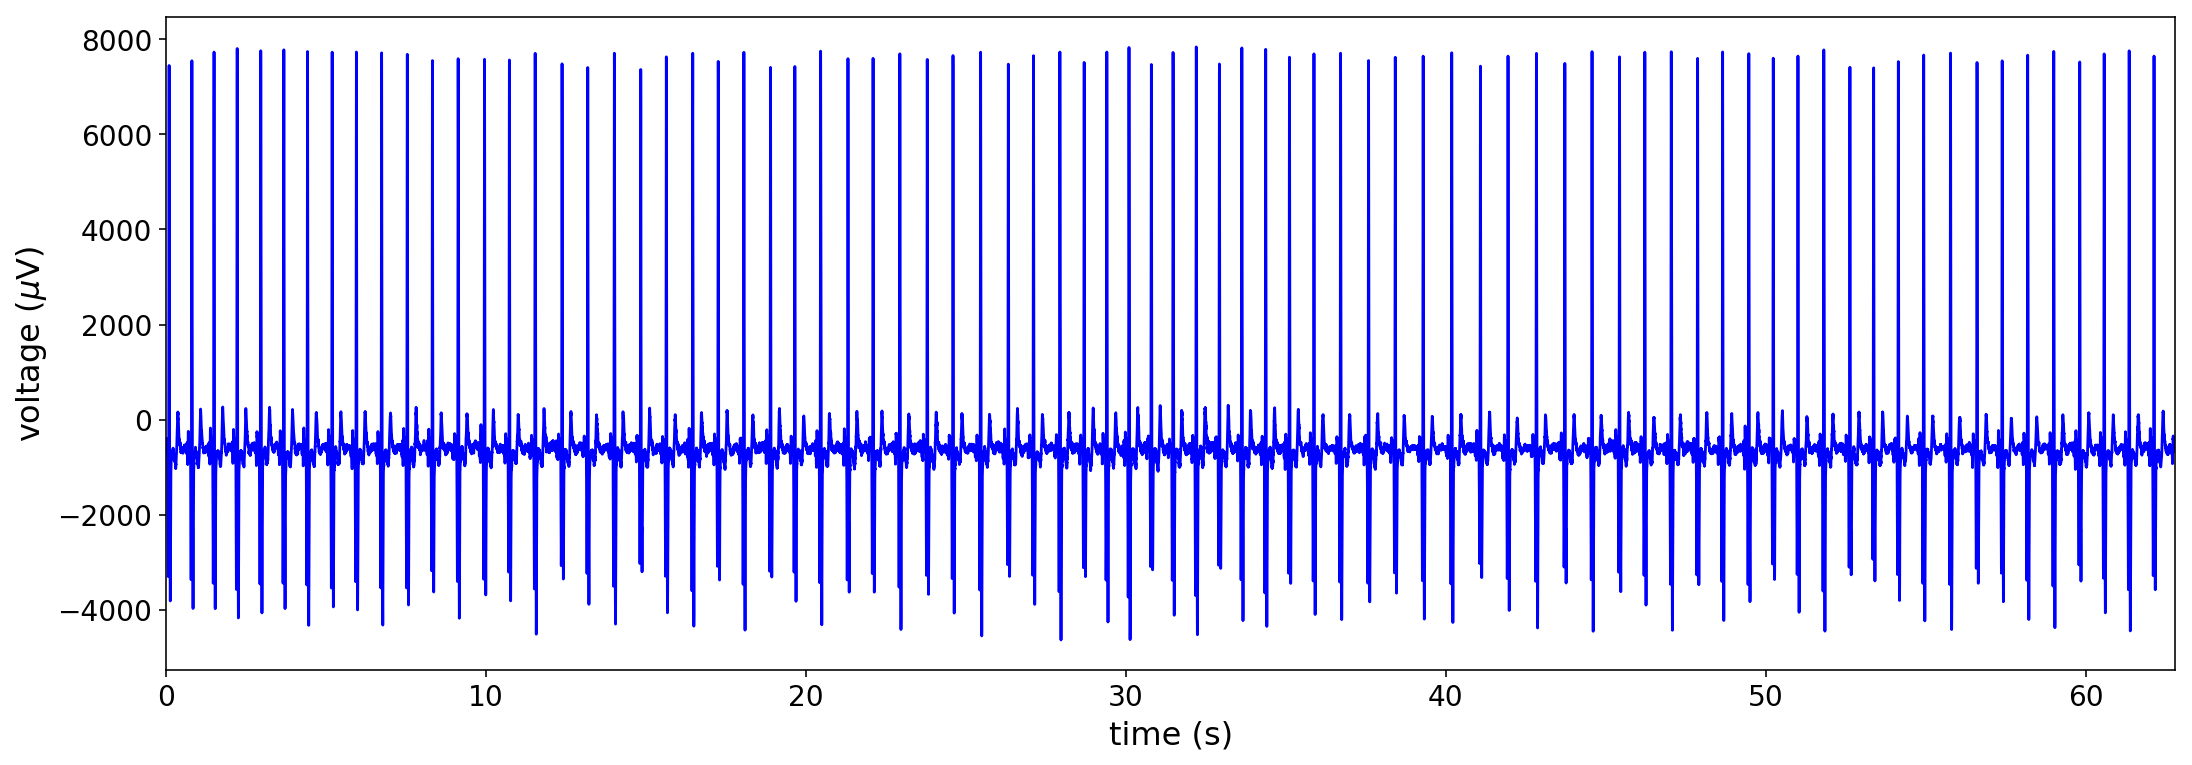

In [6]:
#Obtaining data
timeECG, waveData = ecg("ECG_samples/S1_rest.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(0,max(timeECG))
plt.show()

# What do time series and electrocardiogram have in common?

Well, the ecg is precisely a time series of the heart's electric signals! It is very important to study the heart because the leading cause of death globall are cardiovascular diseases. 3 out of 10 deaths are because of heart disease [WHO, 2019]. 
If simpler techniques for studying the heart are developed, more people could be saved from heart failure. With this in mind, we will start uncovering the intricacies of the heart's dynamics.

# Heart phase space reconstruction in 2D

As the time delays are an arbitrary election, we can choose whichever we want! The only objective of this time lag is to unfold the dynamics of the attractor in phase space.

Let us generate a function that will reconstruct the phase space for a certain time delay. The time series we will be working with is the heart's change in voltage. In the following plots, the axes are $x_n$, which simply represents voltage.

In [9]:
#Generating a function that will reconstruct the phase space for a certain time delay
# data_series is the voltage of our signal
# period is the time delay
# identifier is a string that will help us identify that particular graph
def graph_one(data_series, period = 210, identifier = "xx"):
    time = period*0.1 #time is in miliseconds
    n = np.size(data_series) #size of the voltage vector
    
    plt.figure(2)
    plt. plot(data_series[0: n-period], data_series[period: n],
              marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    plt.title(identifier+r": $t+"+str(time)+"ms$")
    plt.xlabel(r"$x_n$")
    y = r'$x_{n+'+str(time)+"ms}$"
    plt.ylabel(y)
    plt.show()
    return None

Trying out this function.

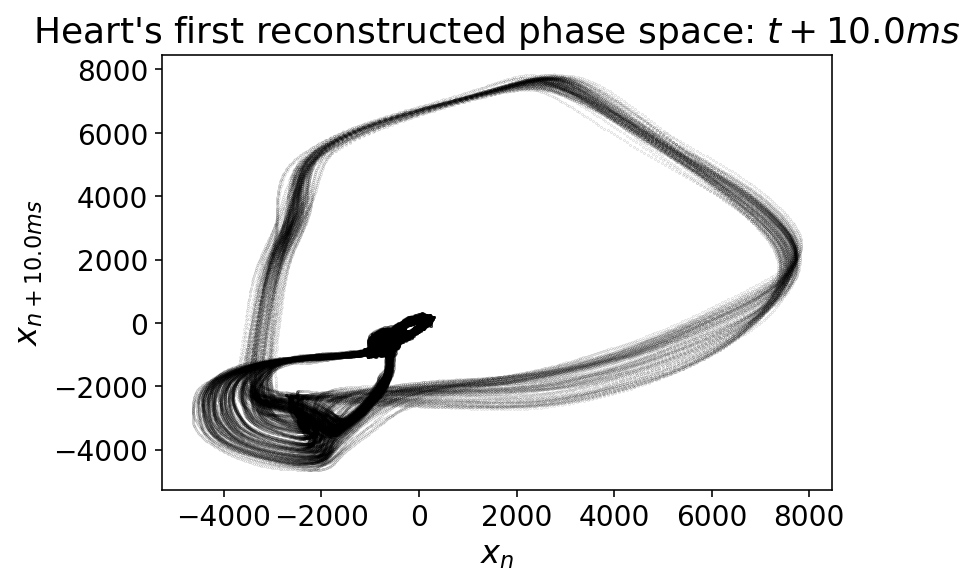

In [10]:
graph_one(waveData, 100, "Heart's first reconstructed phase space")

# Reproducing Petr Saparin’s work

Now that we saw that the function works, let us reproduce Petr Saparin’s work. These time delays are: 1.3 ms, 12.5 ms, 25 ms and 125 ms.

As there is no theoretically accurate time lag, people have used different time lags to study the heart attractor. In some studies, they use this time lag to be the 25% of the ventricular fibrillation cycle length, i.e. 25 ms [Umapathy et al., 2010,
pg. 109] [Gray et al., 1998, pg. 78]. In the following figure, we can see the reconstructed heart's phase space. Notice how every cycle lies in these well defined shapes. We can talk specifically about attractor recontruction in Saparin's work because of the clear dynamics in phase space. The figures below were made with the following time lags:

• Top left: τ = 1.25ms data is close to the diagonal because consecutive values are very similar.

• Top right: τ = 12.5ms large loop corresponds to QRS complex.

• Bottom left: τ = 25ms slower features like P and T waves.

• Bottom right: τ = 125ms complicated attractors.

<img src="Images\Kantz_pg40.jpg" width ="400" height ="150" > 

The previous figure is taken from [Kantz and Schreiber, 2004, pg. 40]. Originally from Petr Saparin (1995).

In [11]:
def graphic_fun(data_series, time_delays = [13, 125, 250, 1250], identifier = "xx"):
    time = time_delays[0]*0.1
    n = np.size(data_series)
    fig, axs = plt.subplots(2,2,figsize=(9,9))
    
    st = fig.suptitle(identifier, fontsize="x-large")
    axs[0, 0].plot(data_series[0: n-time_delays[0]], data_series[time_delays[0]: n],
              marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    axs[0, 0].set_title(r"$t+"+str(time)+"ms$")
    axs[0, 0].set_xlabel(r"$x_n$")
    y = r'$x_{n+'+str(time)+"ms}$"
    axs[0, 0].set_ylabel(y)
    
    time = time_delays[1]*0.1
    axs[0, 1].plot(data_series[0: n-time_delays[1]], data_series[time_delays[1]: n],
              marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    axs[0, 1].set_title(r"$t+"+str(time)+"ms$")
    axs[0, 1].set_xlabel(r"$x_n$")
    y = r'$x_{n+'+str(time)+"ms}$"
    axs[0, 1].set_ylabel(y)
    
    time = time_delays[2]*0.1
    axs[1, 0].plot(data_series[0: n-time_delays[2]], data_series[time_delays[2]: n],
              marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    axs[1, 0].set_title(r"$t+"+str(time)+"ms$")
    axs[1, 0].set_xlabel(r"$x_n$")
    y = r'$x_{n+'+str(time)+"ms}$"
    axs[1, 0].set_ylabel(y)

    time = time_delays[3]*0.1
    axs[1, 1].plot(data_series[0: n-time_delays[3]], data_series[time_delays[3]: n],
              marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    axs[1, 1].set_title(r"$t+"+str(time)+"ms$")
    axs[1, 1].set_xlabel(r"$x_n$")
    y = r'$x_{n+'+str(time)+"ms}$"
    axs[1, 1].set_ylabel(y)

    #Shifts down the subplots
    fig.tight_layout()
    st.set_y(0.85)
    fig.subplots_adjust(top=0.8)
    return None

Trying out the previous function.

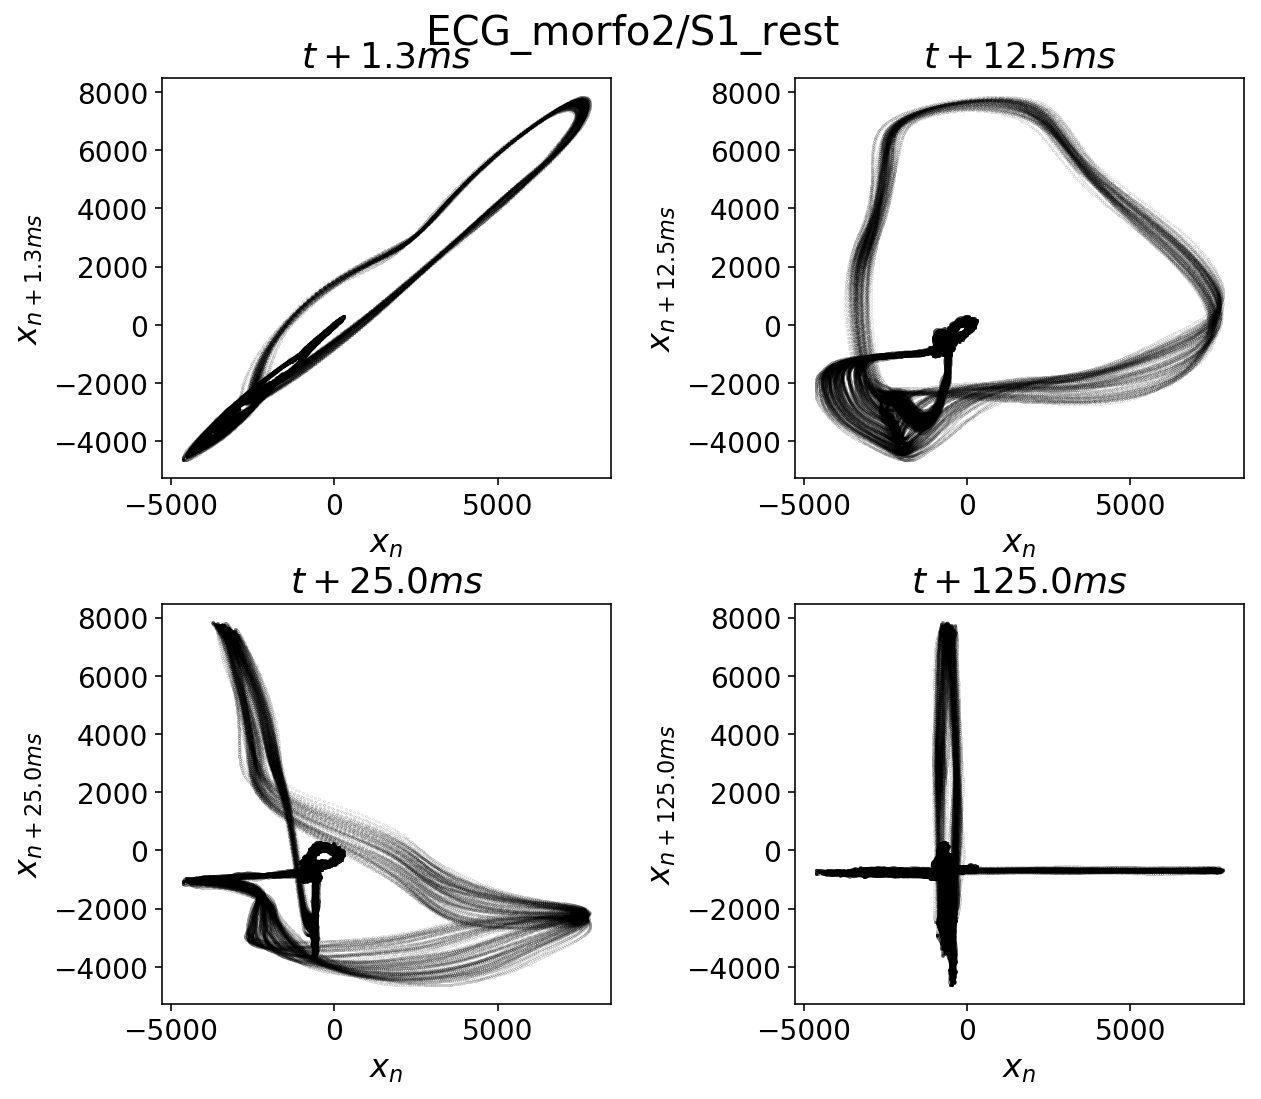

In [13]:
name = "ECG_samples/S1_rest"
time_delays = [13, 125, 250, 1250]

timeECG, waveData = ecg(name+".wav")
graphic_fun(waveData, time_delays, name)

# Rest vs. Exercise

Are you curious to see what happens to the phase space of a person after doing exercise? Try running the following code.

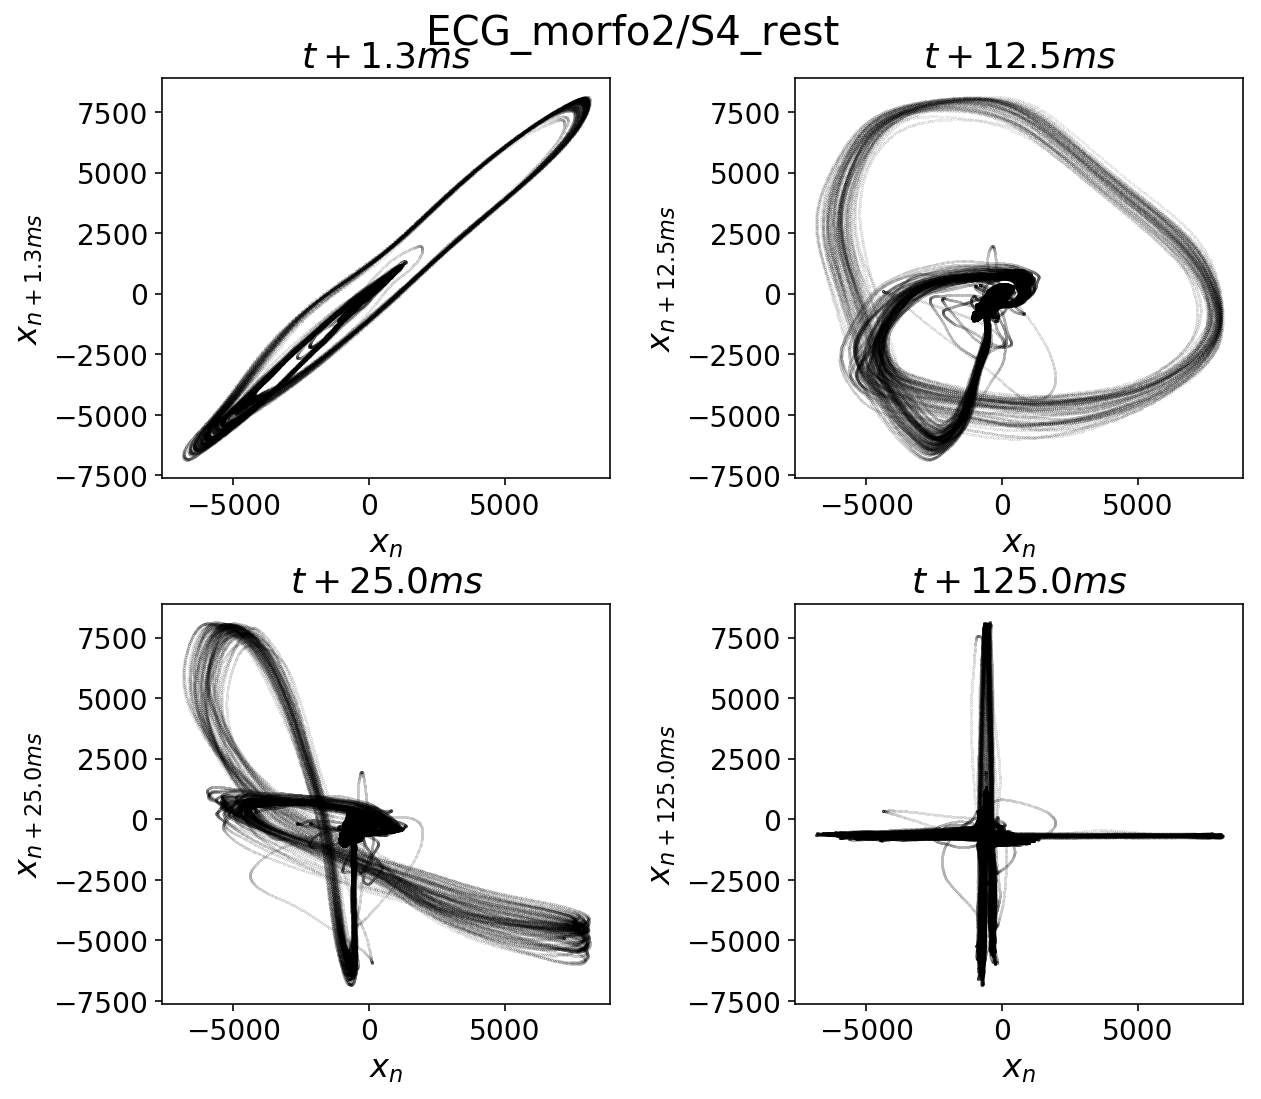

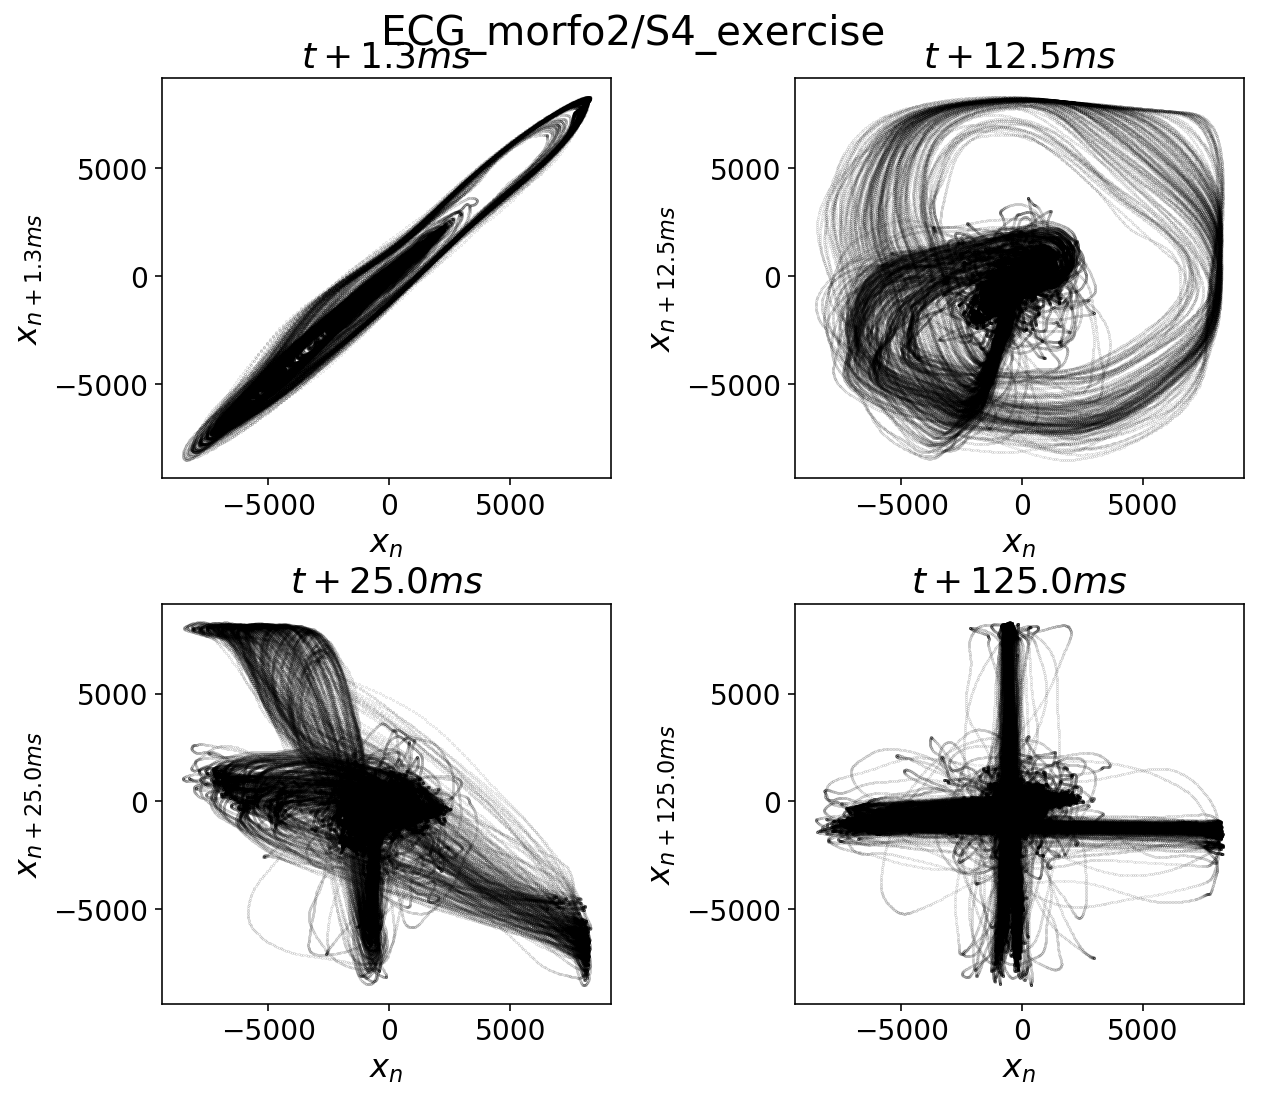

In [14]:
identifiers = ["ECG_samples/S4_rest", "ECG_samples/S4_exercise"]
time_delays = [13, 125, 250, 1250]

for i in range(0, np.size(identifiers)):
    timeECG, waveData = ecg(identifiers[i]+".wav")
    graphic_fun(waveData, time_delays, identifiers[i])

The trayectories in phase space seem to have spread out after the individual does exercise. In other words, the trajectories seem to have a wider range of possibilities than in the resting state.

# Early indicator of heart disease?

Run the following code. Notice if there is any difference with the reconstructed phase spaces you have previously observed. 

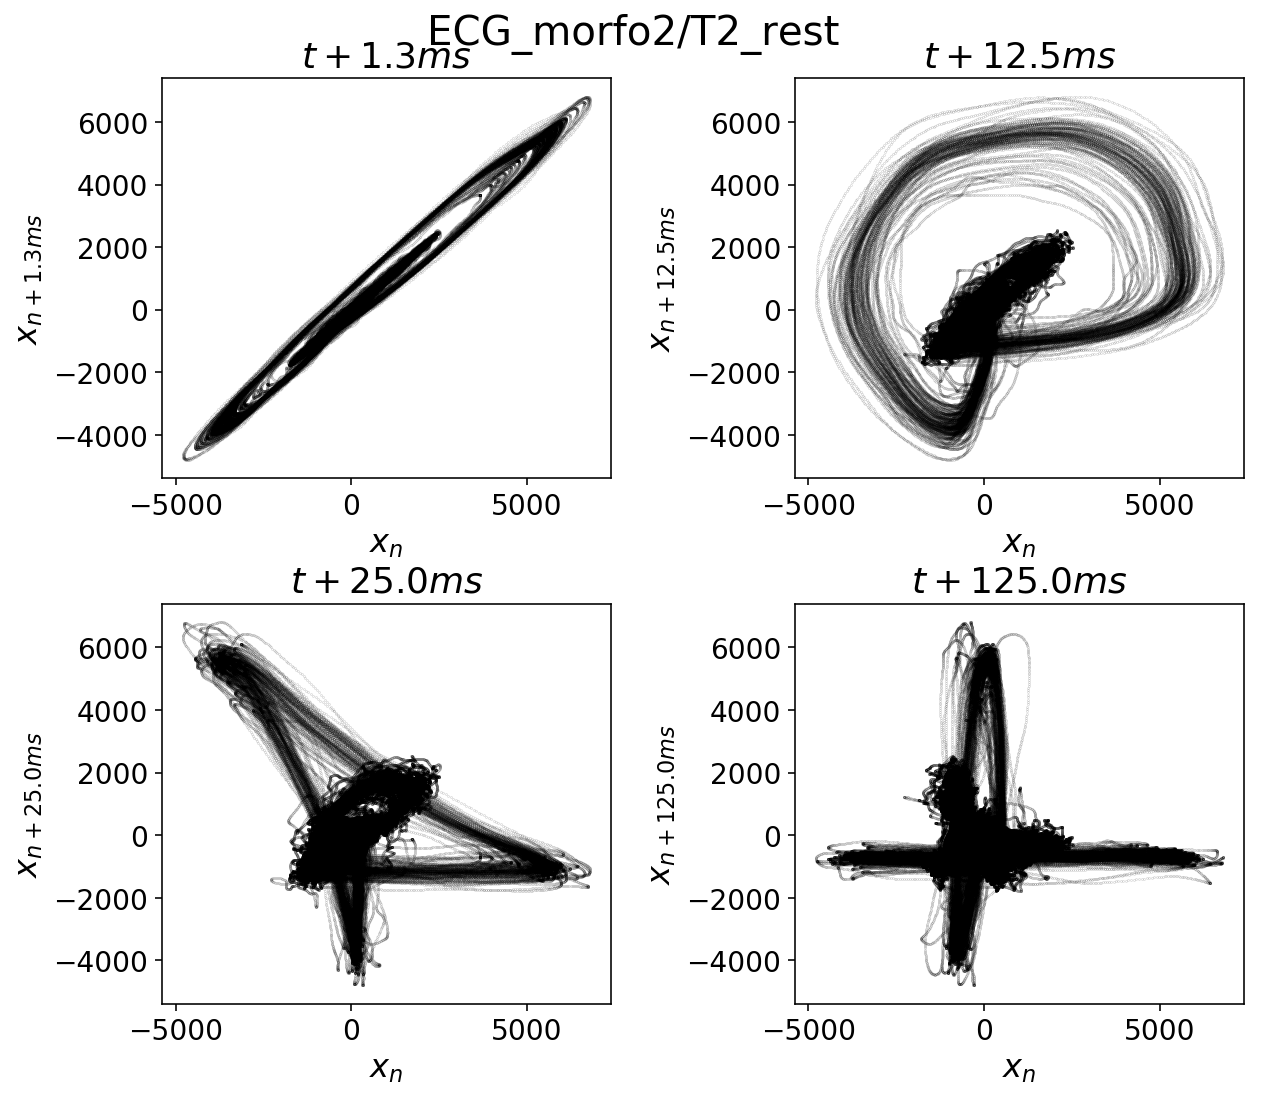

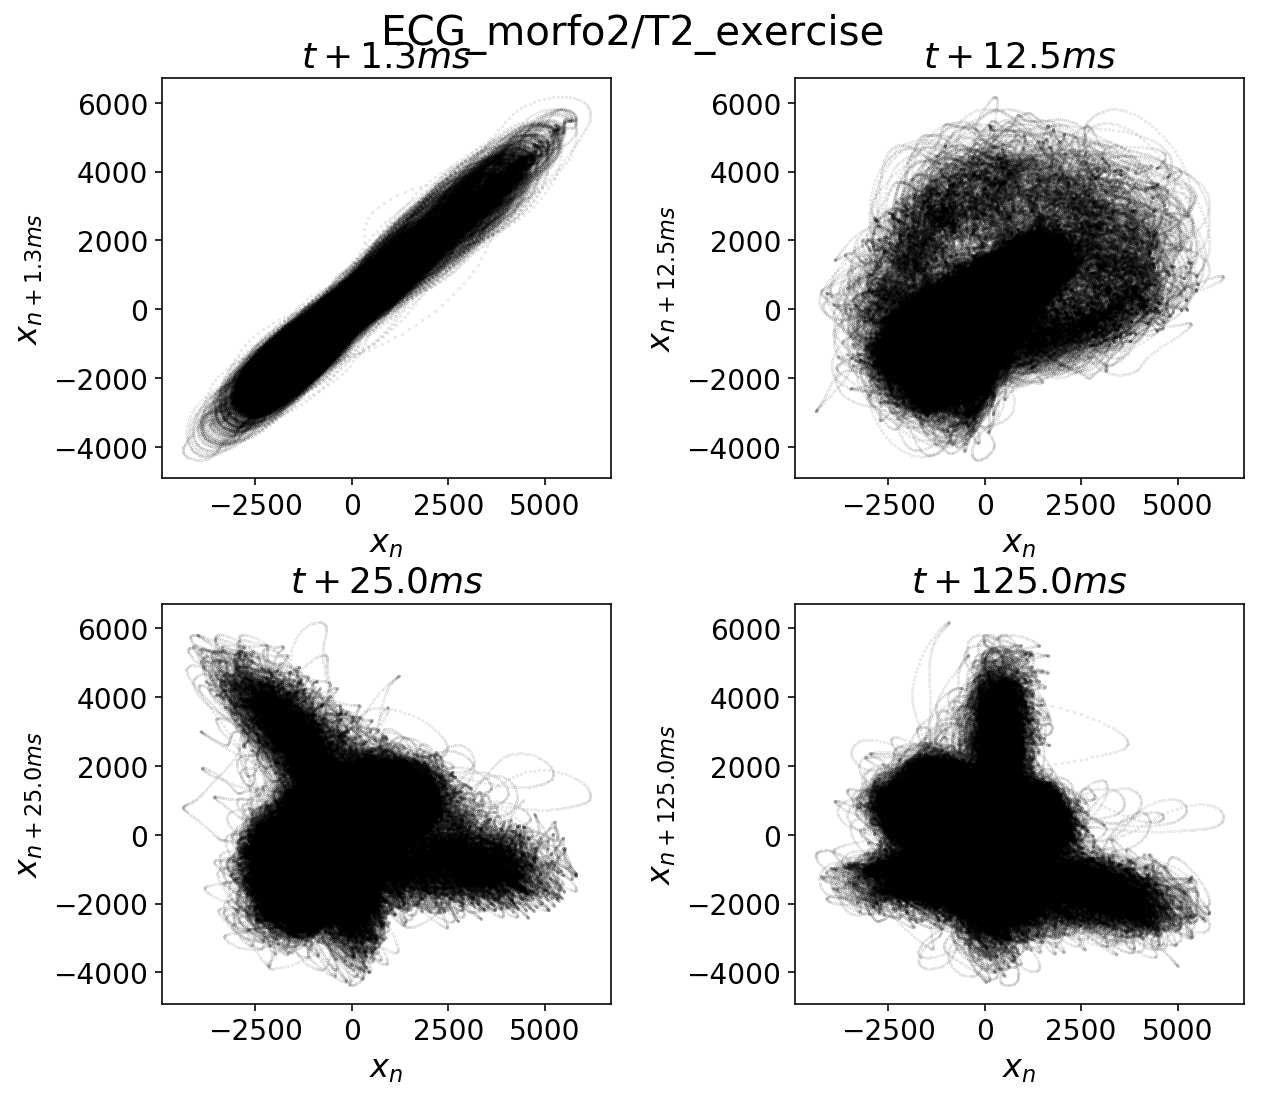

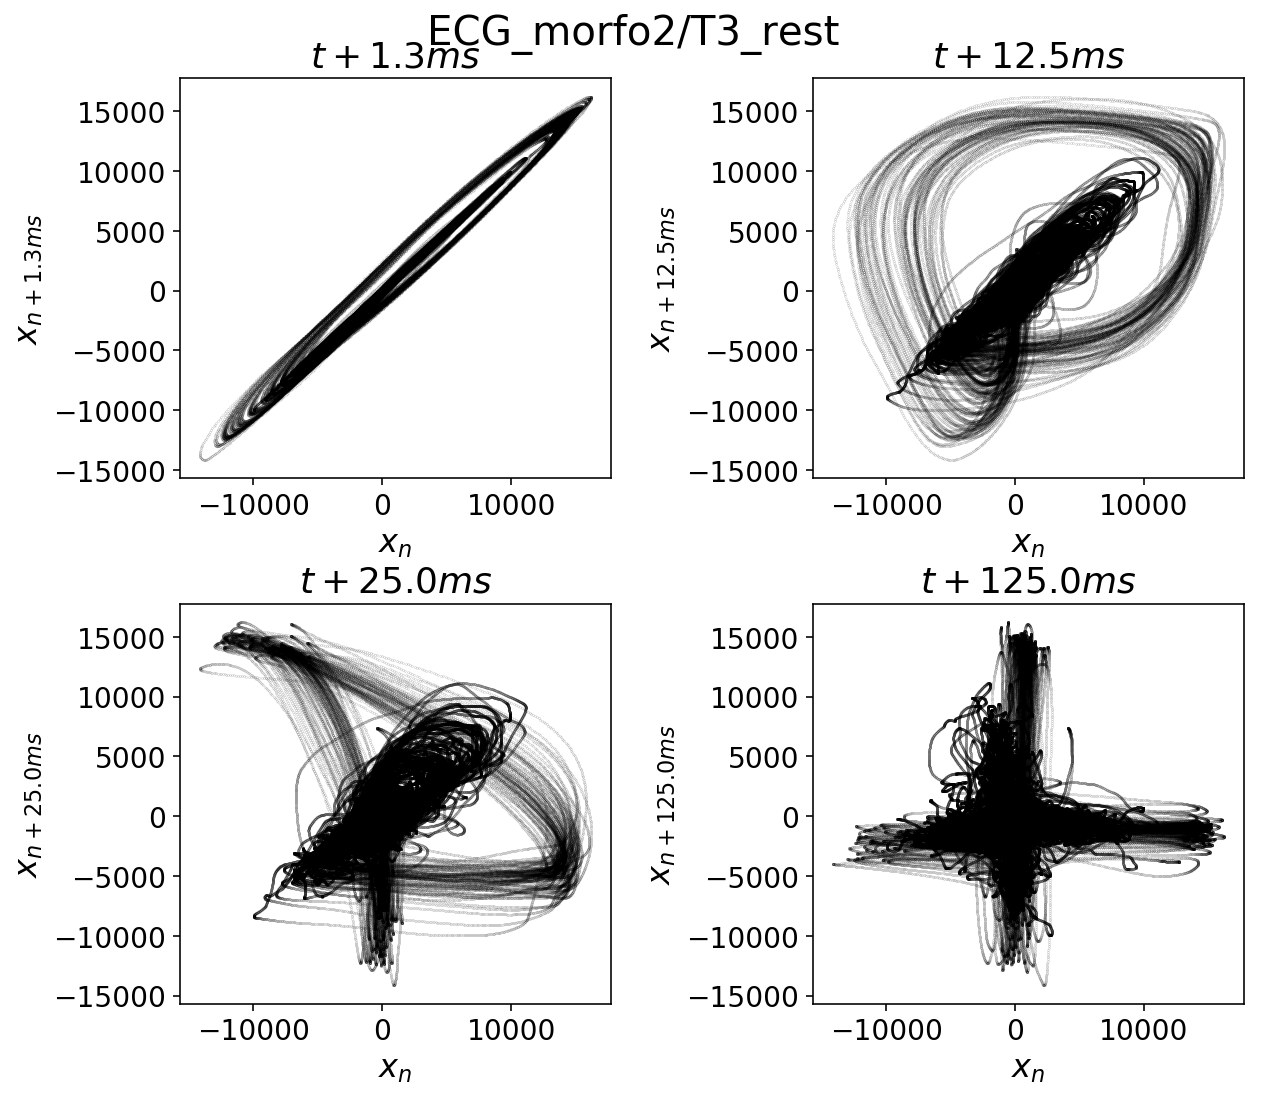

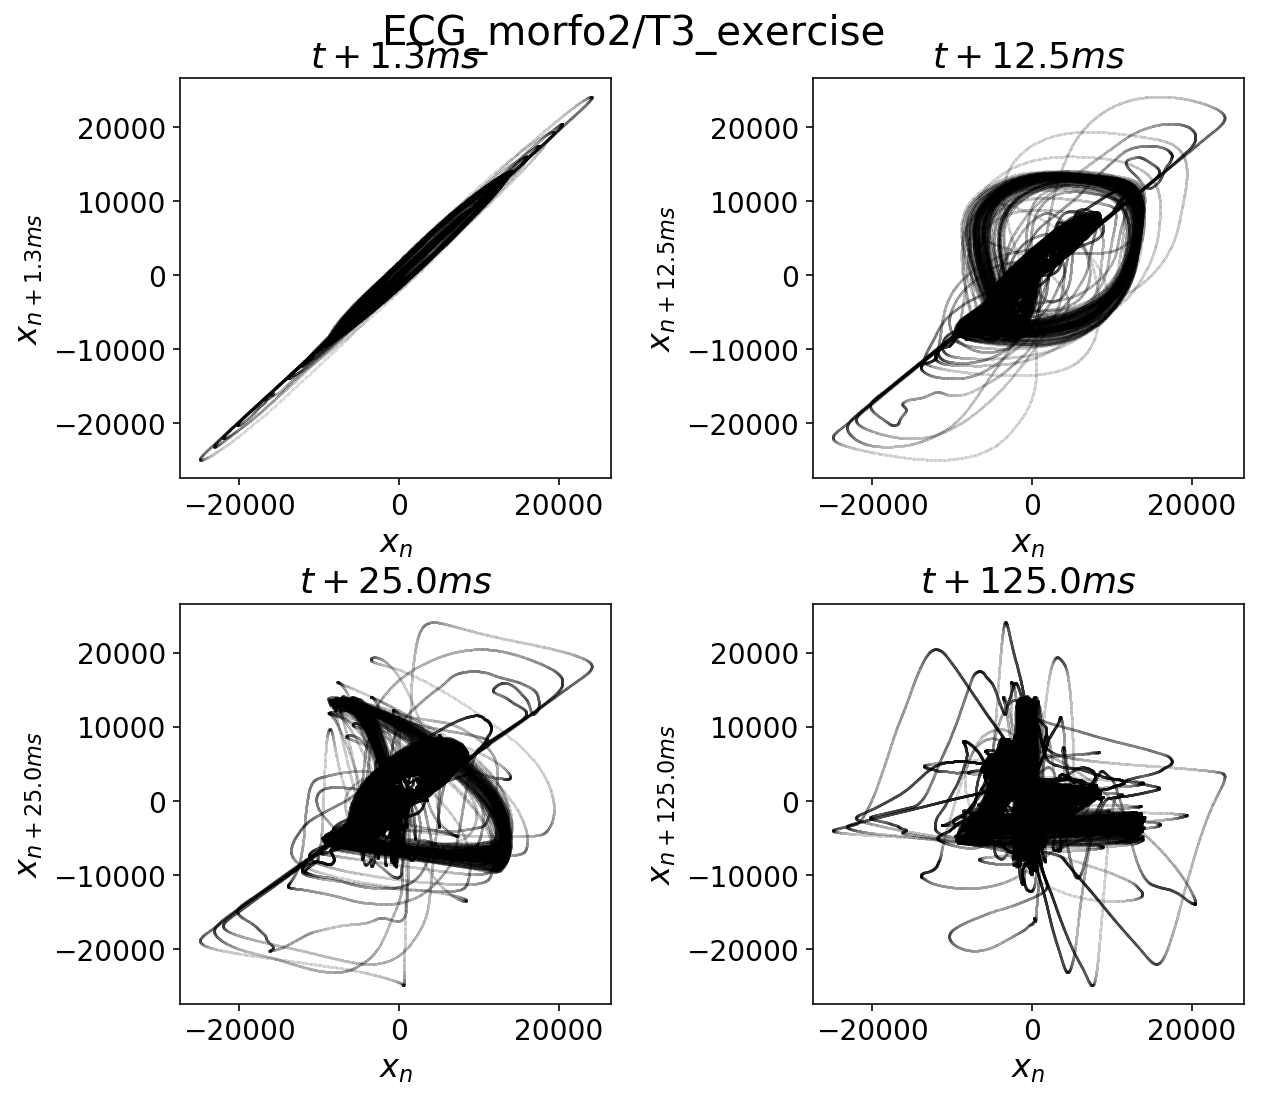

In [16]:
identifiers = ["ECG_samples/T2_rest", "ECG_samples/T2_exercise", "ECG_samples/T3_rest", "ECG_samples/T3_exercise"]
time_delays = [13, 125, 250, 1250]

for i in range(0, np.size(identifiers)):
    timeECG, waveData = ecg(identifiers[i]+".wav")
    graphic_fun(waveData, time_delays, identifiers[i])

T2 is an individual who had the fastest heart rate of a group of around 6 people (*circa* 140 bpm after performing exercise). Notice how after doing exercise, the reconstructed phase space looks like a mass of uncorrelated dots. In this case, we cannot talk about an attractor because there is no defined shape in phase space which the heart follows each time. This could be thought of as an early indicator of heart disease.

T3 is an individual who had a prescription for consuming vasodilators, but did not take them. Notice how the dynamics of this heart changes after doing exercise. This is the only case where the scale for representing the heart’s dynamics doubles after performing exercise. This could be a case of how one type of cardiac arrhythmia looks in state space. Even though we know that this person has a heart condition, we cannot really say if the dynamics we are observing in the phase space is due to his condition or other variables. What we can say is that the dynamics in the recontructed phase space looks different than that of other recordings.

# Heart's phase space reconstruction in 3D

We limit the reconstructed phase space to a 2 dimensional space because it is what we can visualize in a screen. Nevertheless, we know that it is N-dimensional. With current computer software, we can recreate some 3D graphs of this pahse space. The time delays used here are all the possible combinations of the time delays used for the 2D graphs created above. This individual had a healthy and active lifestyle. The recording is at a resting state.

If you are not familiar with plotting in 3 dimensions, you might want to take a look at the following link: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [17]:
#This line of code will allow you to move the 3D plots to see them from any angle!
#3d plot manipulation
%matplotlib notebook

In [18]:
def graph_3d(data_series, period1, period2): #Making graphs in 3D for phase space
    # The vectors should be of the same size, so the last elements will be deleted in case there are extra for a certain vector
    time1 = round(period1*0.1, 2)
    time2 = round(period2*0.1, 2)
    
    n = np.size(data_series)
    x = data_series[0: n-period2]
    y = data_series[period1: n-(period2-period1)]
    z = data_series[period2: n]    
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca(projection='3d')
    ax.set_xlabel(r"$x_n$")
    ax.set_ylabel(r'$x_{n+'+str(time1)+"ms}$")
    ax.set_zlabel(r'$x_{n+'+str(time2)+"ms}$")
    ax.plot(x, y, z, marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
    lbl = r'Phase space with $t_{' + str(time1) +"}$ and $t_{"+ str(time2) + "}$ ms"
    plt.title(lbl)
    plt.show()
    
    return None

Trying the previous function.

<IPython.core.display.Javascript object>


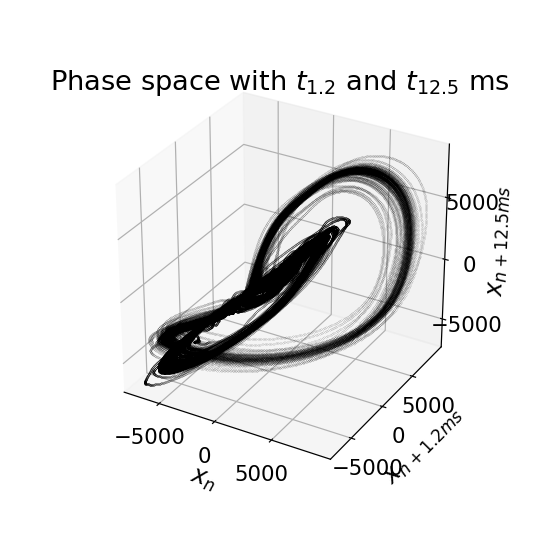

In [26]:
timeECG, waveData = ecg("ECG_samples/T1_rest.wav")
graph_3d(waveData, 12, 125)

Now, we want a single function that plots various combinations of graphs.

In [20]:
def graphi_many_3d(time_delays = [13, 125, 250, 1250], identifier = "xx"):
    
    timeEMC, data_series = ecg(identifier)
    n = np.size(data_series)
    
    fig = plt.figure(figsize=(7.5, 6))
    counter = 1
    
    for i in time_delays:
        for j in time_delays:
            if i != j and i < j: #Each pair of possible combiantions with no repeats
                time1 = round(i*0.1, 2)
                time2 = round(j*0.1, 2)

                n = np.size(data_series)
                x = data_series[0: n-j]
                y = data_series[i: n-(j-i)] #Notice that j>i always, so no need for abs
                z = data_series[j: n]
                
                a = 230+counter
                
                ax = fig.add_subplot(a, projection='3d')
                ax.set_xlabel(r"$x_n$")
                ax.set_ylabel(r'$x_{n+'+str(time1)+"ms}$")
                ax.set_zlabel(r'$x_{n+'+str(time2)+"ms}$")
                ax.plot(x, y, z, marker = "o", markersize = 0.05, linewidth = 0.005, color = "black")
                lbl = r'$t_{' + str(time1) +"}$ and $t_{"+ str(time2) + "}$ ms"
                ax.set_title(lbl)
                counter += 1
    fig.tight_layout()
    plt.show()
    return None

<IPython.core.display.Javascript object>


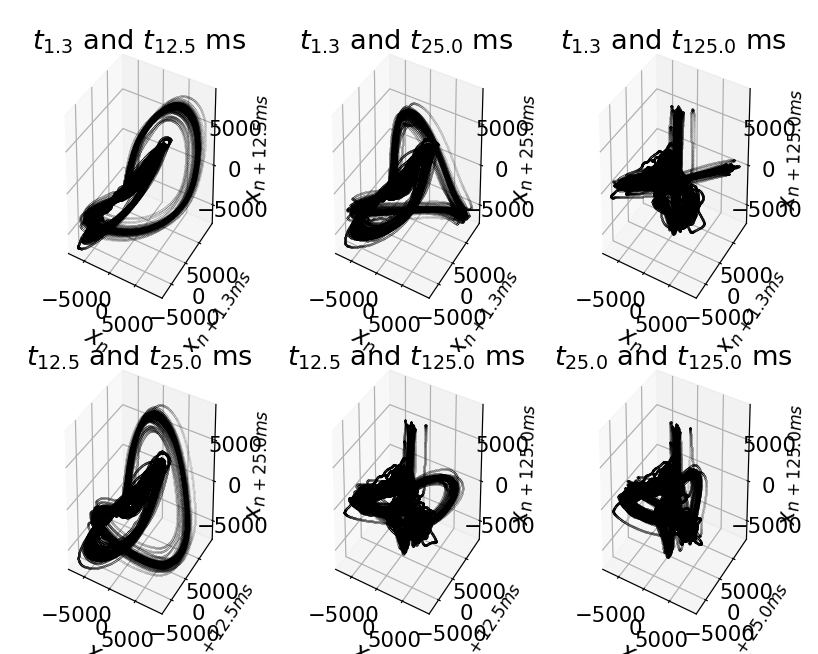

In [21]:
graphi_many_3d([13, 125, 250, 1250], "ECG_samples/T1_rest.wav")

Now, what do you think will happen to the heart's phase space after this person does exercise? 

<IPython.core.display.Javascript object>


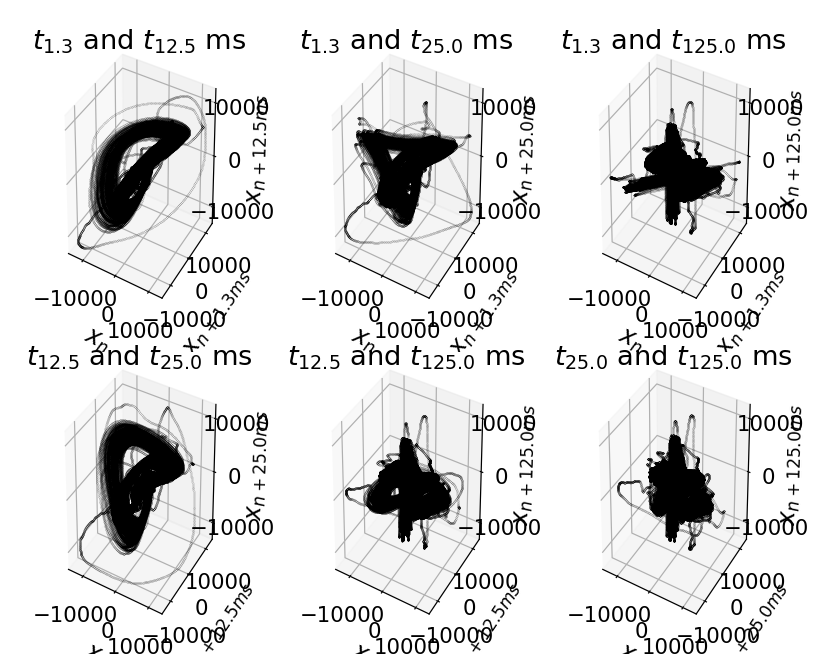

In [22]:
graphi_many_3d([13, 125, 250, 1250], "ECG_samples/T1_exercise.wav")

# Poincaré plots

Poincaré plots have been used in electrocardiogram analysis in the literature since XXX.

A Poincaré plot is basically a scatter plot of a time series. In one axis you plot the current entry and in the other axis you plot the immediate next value. Does this remind you of a reconstructed phase space?

This plot gives you a comparison of how alike are two consecutive values of a time series. We imagine that the Poincaré plot must depend first in the sampling rate. If the sampling rate is high enough compared to the time at which your phenomena is occuring, then two consecutive points must be near each other. Thus, the points must lie near the identity:

$$f(x) = x$$

If you sit down a think a while about this technique, it is basically the reconstruction of phase space. Nevertheless, there are whole books about this topic that never mention phase space!

In [7]:
# Functions for detecting R peaks

def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, higher the threshold_ratio

    if len(timeECG) != len(waveData): #Raises an error if the two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

# If the input of this function is time, the intervals will be given in those same units
# Obtaining the indexes at which the R peaks occur.
def R_intervals(time_indices):
    length = len(time_indices)
    intervals = np.zeros(length-1)
    
    for i in range(0, length-1):
        intervals[i] = time_indices[i+1]-time_indices[i]
    
    return intervals

In [8]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)
xx = R_intervals(timeECG[mxs_indices])
timeRpeaks = timeECG[mxs_indices]

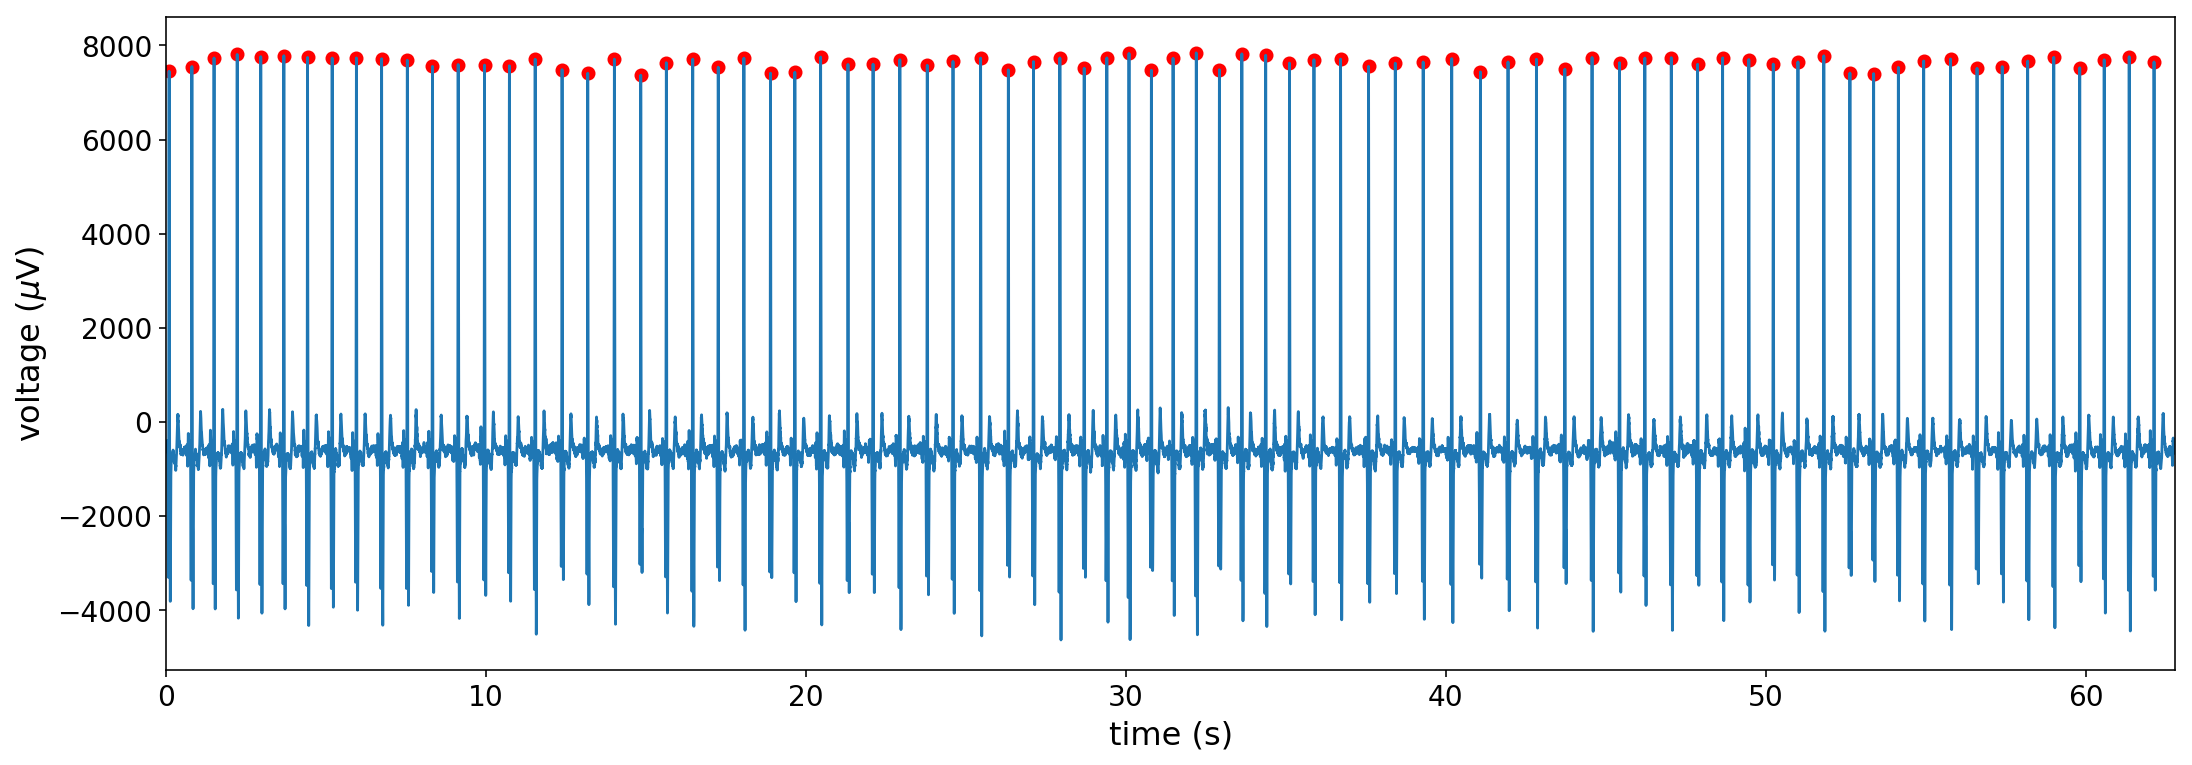

In [9]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

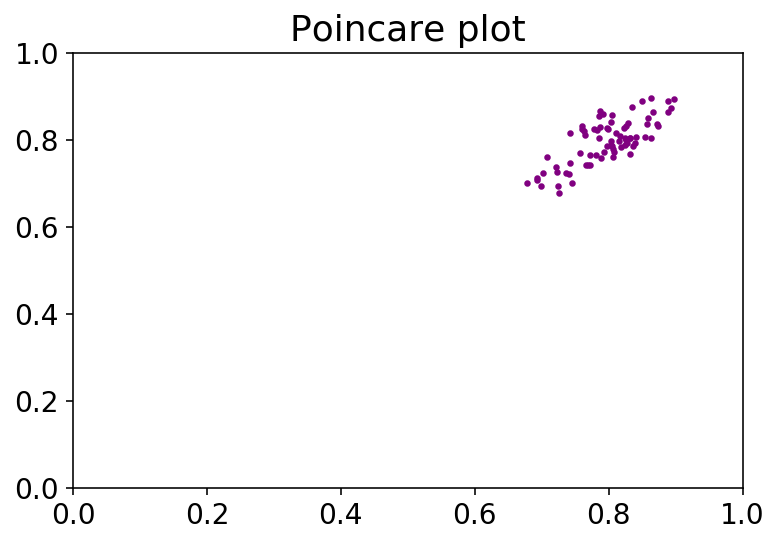

In [10]:
plt.scatter(xx[1:-1], xx[:-2], s = 5, c ="purple")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("Poincare plot")
plt.show()

Surprisingly, there are a lot of articles published that mention Poincaré plots, but not as many that mention phase space. People have tried to obtain heart rate variability measurements from these plots. For example, the distribution of these points in a certain axis, or fitting an elipse that surrounds the data considering the standard deviation in the $f(x)=x$ axis and in its ortogonal axis. Actually, there are some articles that mention the benefits of using statistics for measuring some parameters in the Poincaré plot, but there are others that mention its pitfalls. 

If you are interested in knowing more about Poincaré plots, I suggest you take a look at the following book:

Khandoker, A. H., Karmakar, C., Brennan, M., Palaniswami, M., & Voss, A. (2013). Poincaré plot methods for heart rate variability analysis. Boston, MA, USA: Springer US.

Guzik, P., Piskorski, J., Krauze, T., Schneider, R., Wesseling, K. H., Wykretowicz, A., & Wysocki, H. (2007). Correlations between Poincaré plot and conventional heart rate variability parameters assessed during paced breathing. The Journal of Physiological Sciences, 0702020009-0702020009.

Brennan, M., Palaniswami, M., & Kamen, P. (2001). Do existing measures of Poincare plot geometry reflect nonlinear features of heart rate variability?. IEEE transactions on biomedical engineering, 48(11), 1342-1347.

# Have fun analyzing the recordings!

In [34]:
#Test data
identifiers = ["S1_rest", "S1_exercise", "S2_rest", "S2_exercise",
               "S3_rest", "S3_exercise", "S4_rest", "S4_exercise",
               "T1_rest_5s", "T1_rest", "T1_exercise", "T2_rest", "T2_exercise",
               "T4_rest", "T4_exercise", "T3_rest", "T3_exercise"]

# References

[BackyardBrains, 2017] BackyardBrains (2009-2017). Experiment: Heart Action Potentials. https://backyardbrains.com/experiments/heartrate. Accessed December 20, 2019.

[Boron and Boulpaep, 2012] Boron, W. F. and Boulpaep, E. L. (2012). Medical physiology, 2e updated edition e-book: with student consult online access. Elsevier health sciences.

[Gray et al., 1998] Gray, R. A., Pertsov, A. M., and Jalife, J. (1998). Spatial and temporal organization during cardiac fibrillation. Nature, 392(6671):75.

\*[Kantz and Schreiber, 2004] Kantz, H. and Schreiber, T. (2004). Nonlinear time series analysis, volume 7. Cambridge university press.

\*[Srinivasan et al., 2003] Srinivasan, N., Wong, M., and Krishnan, S. (2003). A new phase space analysis algorithm for cardiac arrhythmia detection. In Proceedings of the 25th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (IEEE Cat. No. 03CH37439), volume 1, pages 82–85. IEEE.

[Umapathy et al., 2010] Umapathy, K., Nair, K., Masse, S., Krishnan, S., Rogers, J., Nash, M. P., and Nanthakumar, K. (2010). Phase mapping of cardiac fibrillation. Circulation: Arrhythmia and Electrophysiology, 3(1):105–114.

[WHO, 2019] WHO (2019). Cardiovascular Diseases. https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds). Accessed December 21, 2019.

\* Denotes the most useful resources for the creation of this notebook.